# Data Collection

In [ ]:
 !pip install --upgrade pandas

In [ ]:
# Import Libraries
from google.colab import files
from tabulate import tabulate
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv("data_intro.csv", delimiter=";", parse_dates=['Date'], dayfirst=True)
data = df.values.tolist()
headers = df.columns.tolist()

In [ ]:
# Show dataset
table = tabulate(data, headers, tablefmt="fancy_grid")
print(table)

╒════════════════╤══════════╤═════════════════╤══════════════╤═══════════════╤═══════════════════╤═════════╤══════════╤═════════╤════════════════════╤════════════╤════════════╕
│   ID Pelanggan │ Nama     │   Jenis Kelamin │   Pendapatan │ Merk Produk   │ Kategori          │   Harga │   Jumlah │   Total │   Tingkat Kepuasan │   Quantity │ Date       │
╞════════════════╪══════════╪═════════════════╪══════════════╪═══════════════╪═══════════════════╪═════════╪══════════╪═════════╪════════════════════╪════════════╪════════════╡
│              1 │ Arif     │               1 │       600000 │ Uniqlo        │ Pakaian           │  100000 │        4 │  400000 │                  2 │          4 │ 2022-02-01 │
├────────────────┼──────────┼─────────────────┼──────────────┼───────────────┼───────────────────┼─────────┼──────────┼─────────┼────────────────────┼────────────┼────────────┤
│              2 │ Dian     │               2 │      1200000 │ Safi          │ Perawatan         │  250000 │       

# Data Exploration



In [ ]:
df.describe()

,ID Pelanggan,Jenis Kelamin,Pendapatan,Harga,Jumlah,Total,Tingkat Kepuasan,Quantity
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,50.500000,1.510000,9.410000e+05,197500.000000,3.490000,6.740000e+05,2.980000,3.490000
std,29.011492,0.502418,6.065043e+05,66124.690906,1.132576,2.942410e+05,1.154526,1.132576
min,1.000000,1.000000,4.000000e+05,100000.000000,1.000000,2.000000e+05,1.000000,1.000000
25%,25.750000,1.000000,7.000000e+05,150000.000000,3.000000,5.000000e+05,2.000000,3.000000
50%,50.500000,2.000000,8.750000e+05,200000.000000,4.000000,6.000000e+05,3.000000,4.000000
75%,75.250000,2.000000,1.100000e+06,250000.000000,4.000000,9.000000e+05,4.000000,4.000000
max,100.000000,2.000000,6.450000e+06,300000.000000,5.000000,1.500000e+06,5.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID Pelanggan      100 non-null    int64 
 1   Nama              100 non-null    object
 2   Jenis Kelamin     100 non-null    int64 
 3   Pendapatan        100 non-null    int64 
 4   Merk Produk       100 non-null    object
 5   Kategori          100 non-null    object
 6   Harga             100 non-null    int64 
 7   Jumlah            100 non-null    int64 
 8   Total             100 non-null    int64 
 9   Tingkat Kepuasan  100 non-null    int64 
 10  Quantity          100 non-null    int64 
 11  Date              100 non-null    object
dtypes: int64(8), object(4)
memory usage: 9.5+ KB


In [ ]:
df.isnull().sum()

,0
ID Pelanggan,0
Nama,0
Jenis Kelamin,0
Pendapatan,0
Merk Produk,0
Kategori,0
Harga,0
Jumlah,0
Total,0
Tingkat Kepuasan,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
95,False
96,False
97,False
98,False


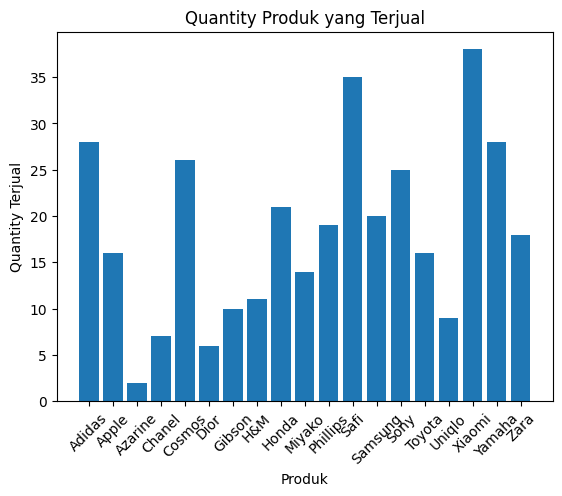

In [ ]:
# Menghitung total quantity produk yang terjual per kategori produk
quantity_per_produk = df.groupby('Merk Produk')['Quantity'].sum()

# Membuat plot bar chart
plt.bar(quantity_per_produk.index, quantity_per_produk.values)
plt.xlabel('Produk')
plt.ylabel('Quantity Terjual')
plt.title('Quantity Produk yang Terjual')
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

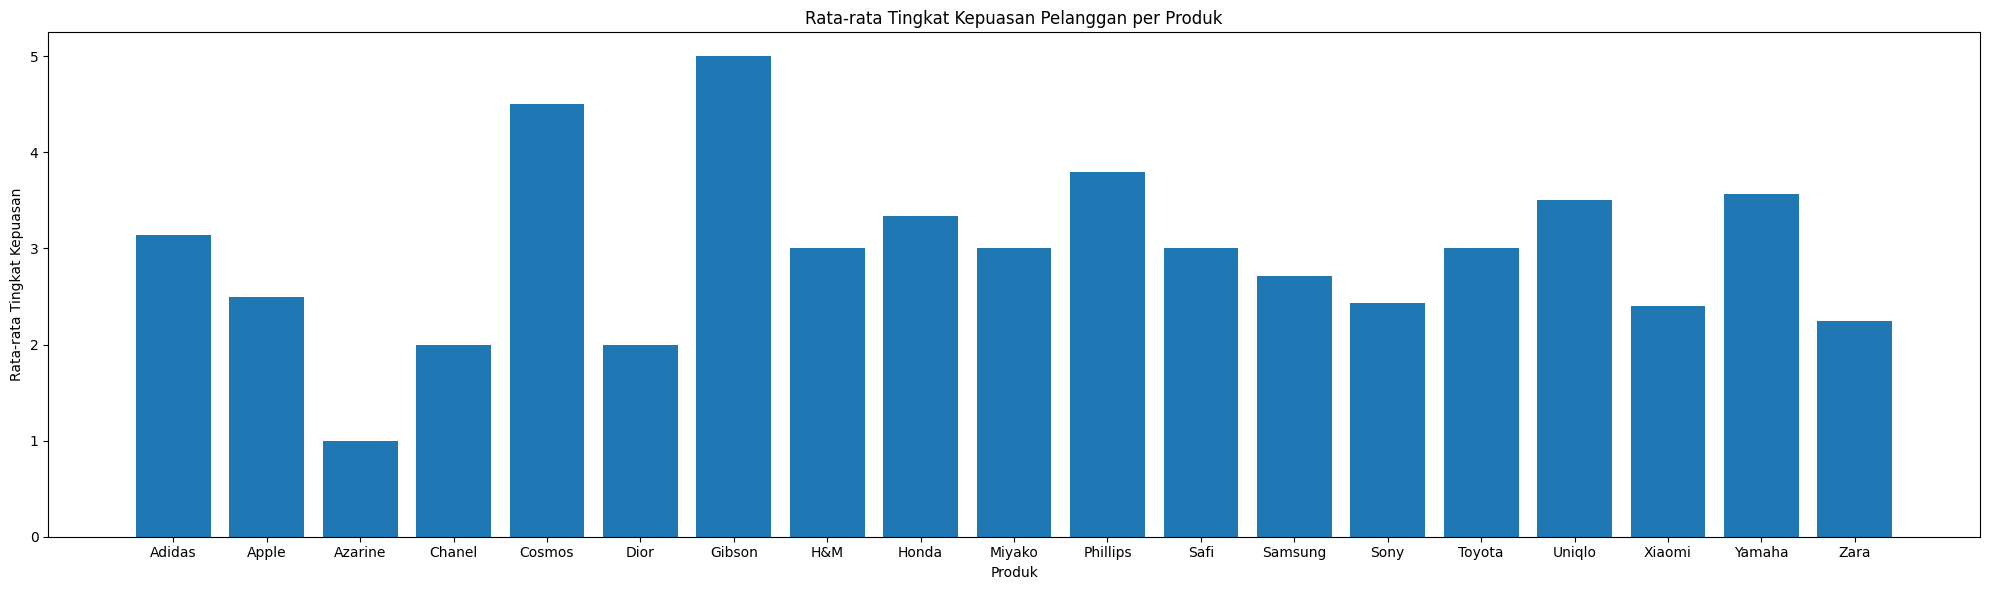

In [ ]:
# Menghitung rata-rata tingkat kepuasan pelanggan untuk setiap produk
avg_satisfaction = df.groupby('Merk Produk')['Tingkat Kepuasan'].mean()

# Menampilkan rata-rata tingkat kepuasan pelanggan
# print("Rata-rata Tingkat Kepuasan Pelanggan per Produk:")
# for product, satisfaction in avg_satisfaction.items():
#     print(f"Produk {product}: {satisfaction}")

# Membuat grafik batang
plt.figure(figsize=(20, 6))
plt.bar(avg_satisfaction.index, avg_satisfaction.values)
plt.xlabel('Produk')
plt.ylabel('Rata-rata Tingkat Kepuasan')
plt.title('Rata-rata Tingkat Kepuasan Pelanggan per Produk')
plt.tight_layout()

# Menampilkan grafik
plt.show()

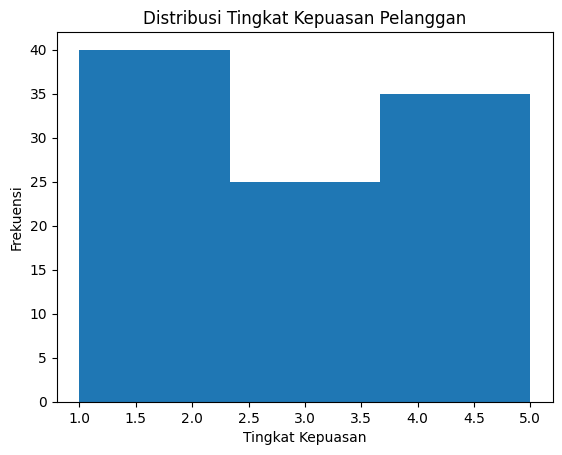

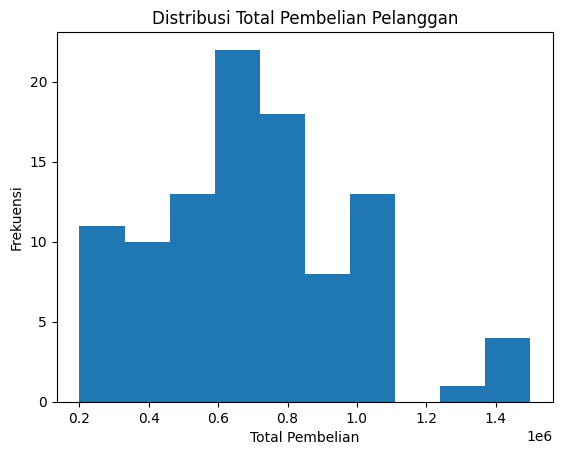

In [ ]:
# Analisis Tingkat Kepuasan
# Periksa distribusi tingkat kepuasan
plt.hist(df["Tingkat Kepuasan"], bins=3)
plt.xlabel("Tingkat Kepuasan")
plt.ylabel("Frekuensi")
plt.title("Distribusi Tingkat Kepuasan Pelanggan")
plt.show()

# Analisis Total
# Periksa distribusi total pembelian
plt.hist(df["Total"], bins=10)
plt.xlabel("Total Pembelian")
plt.ylabel("Frekuensi")
plt.title("Distribusi Total Pembelian Pelanggan")
plt.show()

<ipython-input-31-4cc53897720b>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')


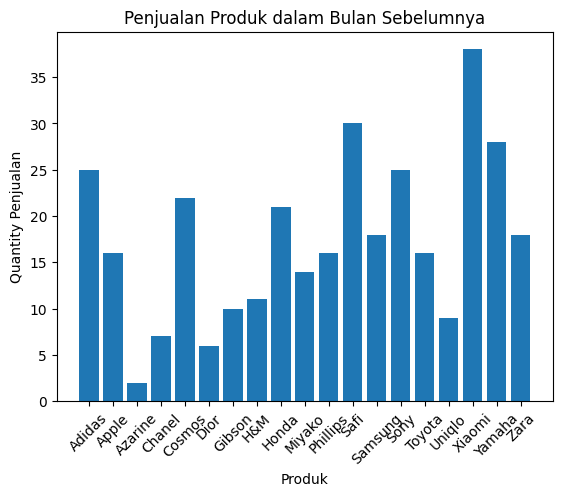

In [ ]:
# Mengonversi kolom 'Date' menjadi tipe data datetime
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')

# Mengambil bulan-bulan sebelumnya
current_month = pd.to_datetime('today').month
previous_months = range(1, current_month)

# Mengambil data produk yang terjual dalam bulan-bulan sebelumnya
previous_data = df[df['Date'].dt.month.isin(previous_months)]

# Menghitung total quantity penjualan untuk setiap produk
product_sales = previous_data.groupby('Merk Produk')['Quantity'].sum()

# Membuat plot bar chart
plt.bar(product_sales.index, product_sales.values)
plt.xlabel('Produk')
plt.ylabel('Quantity Penjualan')
plt.title('Penjualan Produk dalam Bulan Sebelumnya')
plt.xticks(rotation=45)
plt.show()

# Data Preprocessing




In [ ]:
# Mengubah tipe data yang diperlukan
df['Jenis Kelamin'] = df['Jenis Kelamin'].astype(int)
df['Tingkat Kepuasan'] = df['Tingkat Kepuasan'].astype(int)

# Encoding variabel kategorikal
label_encoder = LabelEncoder()
df['Merk Produk'] = label_encoder.fit_transform(df['Merk Produk'])
df['Kategori'] = label_encoder.fit_transform(df['Kategori'])

# Menghapus kolom yang tidak diperlukan
df = df.drop(['ID Pelanggan', 'Nama', 'Quantity', 'Date'], axis=1)

# Data Training

In [ ]:
# Membagi data training dan testing
X = df.drop('Tingkat Kepuasan', axis=1)
y = df['Tingkat Kepuasan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

# Data Modelling

In [ ]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Data Evaluation

Accuracy Score: 0.55


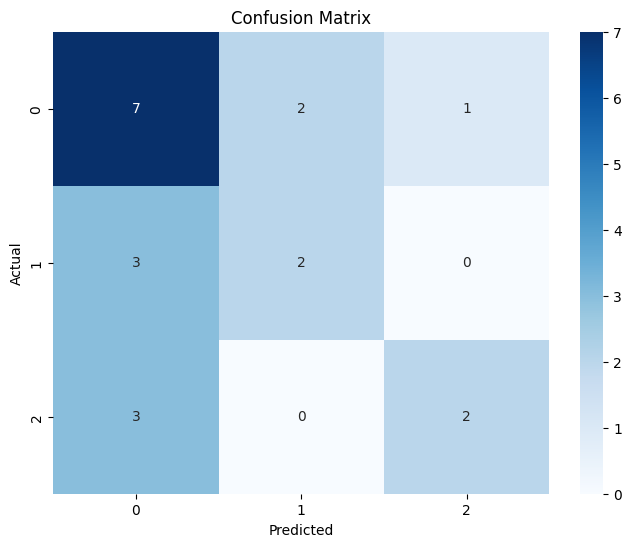

Classification Report:
               precision    recall  f1-score   support

           2       0.54      0.70      0.61        10
           3       0.50      0.40      0.44         5
           4       0.67      0.40      0.50         5

    accuracy                           0.55        20
   macro avg       0.57      0.50      0.52        20
weighted avg       0.56      0.55      0.54        20

Class Probabilities:
 [[3.28942380e-03 6.17110787e-01 2.52741108e-01 1.10990109e-01
  1.58685718e-02]
 [4.07973919e-03 4.77198163e-01 1.77413947e-01 2.73296730e-01
  6.80114206e-02]
 [5.11896142e-03 8.58559105e-01 1.27398050e-01 7.14855889e-03
  1.77532493e-03]
 [4.81053987e-03 8.37288362e-01 1.21101267e-01 2.01939263e-02
  1.66059053e-02]
 [1.61890185e-02 1.23023194e-01 7.06074823e-01 1.46238408e-01
  8.47455645e-03]
 [3.69559211e-03 6.21212324e-01 2.42388997e-01 1.14116313e-01
  1.85867734e-02]
 [1.90958554e-02 8.05125738e-01 1.67950343e-01 4.16313058e-03
  3.66493246e-03]
 [5.81805906e

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Hitung probabilitas kelas
class_probs = model.predict_proba(X_test)
print('Class Probabilities:\n', class_probs)

# Data Classification (Naive Bayes)

In [ ]:
import csv

def get_product_sales(data, brand):
    total_sales = 0
    for row in data:
        if row['Merk Produk'] == brand:
            total_sales += int(row['Quantity'])
    return total_sales

def calculate_average_sales(data, brand):
    total_sales = 0
    count = 0
    for row in data:
        if row['Merk Produk'] == brand:
            total_sales += int(row['Quantity'])
            count += 1
    if count > 0:
        average_sales = total_sales / count
        return average_sales
    else:
        return 0

def calculate_rating(restock_info):
    rating = float(restock_info['Tingkat Kepuasan'])
    return rating

def calculate_restock_quantity(restock_info, average_sales):
    rating = calculate_rating(restock_info)
    quantity = int(restock_info['Quantity'])

    if quantity >= average_sales and rating >= 4.5:
        return round(average_sales * 2)
    elif quantity >= average_sales and 4 <= rating < 4.5:
        return round(average_sales * 1.5)
    elif quantity >= average_sales and 3.5 <= rating < 4:
        return round(average_sales * 1.1)
    elif quantity >= average_sales and 1 <= rating < 3.5:
        return round(average_sales)
    elif quantity < average_sales and rating >= 4.5:
        return round(average_sales)
    elif quantity < average_sales and 4 <= rating < 4.5:
        return round(average_sales * 0.9)
    elif quantity < average_sales and 3.5 <= rating < 4:
        return round(average_sales * 0.5)
    elif quantity < average_sales and 1 <= rating < 3.5:
        return round(average_sales * 0.2)
    else:
        return 0

# Membaca data dari file CSV
data = []
with open('data_intro.csv', 'r') as file:
    reader = csv.DictReader(file, delimiter=';')
    for row in reader:
        data.append(row)

# Mendapatkan daftar merk produk yang tersedia
brands = set([row['Merk Produk'] for row in data])

# Menampilkan informasi produk
for brand in brands:
    print('Nama Produk:', brand)
    total_sales = get_product_sales(data, brand)
    print('Total Penjualan Bulan Sebelumnya:', total_sales)

    average_sales = calculate_average_sales(data, brand)
    # print('Rata-rata Penjualan Bulan Sebelumnya:', average_sales)

    total_restock = 0  # Menyimpan total restock

    for row in data:
        if row['Merk Produk'] == brand:
            restock_quantity = calculate_restock_quantity(row, average_sales)
            if restock_quantity > 0:
                print('Restock product +', restock_quantity, 'dari', row['Quantity'], 'penjualan pada tanggal', row['Date'])
                total_restock += restock_quantity

    print('Total Restock:', total_restock)
    print('----------------------------------------------------------')

Nama Produk: Dior
Total Penjualan Bulan Sebelumnya: 6
Restock product + 2 dari 2 penjualan pada tanggal 2022-02-28
Restock product + 2 dari 2 penjualan pada tanggal 2022-02-21
Restock product + 2 dari 2 penjualan pada tanggal 2022-02-11
Total Restock: 6
----------------------------------------------------------
Nama Produk: Chanel
Total Penjualan Bulan Sebelumnya: 7
Restock product + 1 dari 3 penjualan pada tanggal 2022-02-04
Restock product + 4 dari 4 penjualan pada tanggal 2022-02-07
Total Restock: 5
----------------------------------------------------------
Nama Produk: Azarine
Total Penjualan Bulan Sebelumnya: 2
Restock product + 2 dari 2 penjualan pada tanggal 2022-02-18
Total Restock: 2
----------------------------------------------------------
Nama Produk: Phillips
Total Penjualan Bulan Sebelumnya: 19
Restock product + 1 dari 3 penjualan pada tanggal 2022-02-14
Restock product + 8 dari 5 penjualan pada tanggal 2022-02-26
Restock product + 1 dari 3 penjualan pada tanggal 2022-02-

In [ ]:
import csv

def get_product_sales(data, brand):
    total_sales = 0
    for row in data:
        if row['Merk Produk'] == brand:
            total_sales += int(row['Quantity'])
    return total_sales

def calculate_average_sales(data, brand):
    total_sales = 0
    count = 0
    for row in data:
        if row['Merk Produk'] == brand:
            total_sales += int(row['Quantity'])
            count += 1
    if count > 0:
        average_sales = total_sales / count
        return average_sales
    else:
        return 0

def calculate_rating(restock_info):
    rating = float(restock_info['Tingkat Kepuasan'])
    return rating

def calculate_restock_quantity(restock_info, average_sales):
    rating = calculate_rating(restock_info)
    quantity = int(restock_info['Quantity'])

    if quantity >= average_sales and rating >= 4.5:
        return round(average_sales * 2)
    elif quantity >= average_sales and 4 <= rating < 4.5:
        return round(average_sales * 1.5)
    elif quantity >= average_sales and 3.5 <= rating < 4:
        return round(average_sales * 1.1)
    elif quantity >= average_sales and 1 <= rating < 3.5:
        return round(average_sales)
    elif quantity < average_sales and rating >= 4.5:
        return round(average_sales)
    elif quantity < average_sales and 4 <= rating < 4.5:
        return round(average_sales * 0.9)
    elif quantity < average_sales and 3.5 <= rating < 4:
        return round(average_sales * 0.5)
    elif quantity < average_sales and 1 <= rating < 3.5:
        return round(average_sales * 0.2)
    else:
        return 0

# Membaca data dari file CSV
data = []
with open('data_intro.csv', 'r') as file:
    reader = csv.DictReader(file, delimiter=';')
    for row in reader:
        data.append(row)

# Mendapatkan daftar merk produk yang tersedia
brands = set([row['Merk Produk'] for row in data])

# Menampilkan informasi produk
df = pd.DataFrame(columns=['Merk Produk', 'Total Restock'])

for brand in brands:
    total_sales = get_product_sales(data, brand)
    average_sales = calculate_average_sales(data, brand)
    total_restock = 0

    for row in data:
        if row['Merk Produk'] == brand:
            restock_quantity = calculate_restock_quantity(row, average_sales)
            if restock_quantity > 0:
                total_restock += restock_quantity

    df = pd.concat([df, pd.DataFrame({'Merk Produk': [brand], 'Total Restock': [total_restock]})], ignore_index=True)

# Mengklasifikasikan produk berdasarkan total restock
df['Klasifikasi'] = pd.cut(df['Total Restock'], bins=[-float('inf'), 10, 25, float('inf')], labels=['Produk Tidak Laku', 'Produk Cukup Laku', 'Produk Laku'], right=False)

# Membagi data menjadi fitur (X) dan label (y)
X = df[['Total Restock']]
y = df['Klasifikasi']

# Membuat model Naive Bayes
model = GaussianNB()
model.fit(X, y)

# Melakukan prediksi klasifikasi untuk semua data
df['Klasifikasi'] = model.predict(X)

# Menampilkan tabel hasil klasifikasi
result = df[['Merk Produk', 'Klasifikasi', 'Total Restock']].drop_duplicates('Merk Produk')
table = tabulate(result, headers='keys', tablefmt='fancy_grid', showindex=False)
print(table)

╒═══════════════╤═══════════════════╤═════════════════╕
│ Merk Produk   │ Klasifikasi       │   Total Restock │
╞═══════════════╪═══════════════════╪═════════════════╡
│ Dior          │ Produk Tidak Laku │               6 │
├───────────────┼───────────────────┼─────────────────┤
│ Chanel        │ Produk Tidak Laku │               5 │
├───────────────┼───────────────────┼─────────────────┤
│ Azarine       │ Produk Tidak Laku │               2 │
├───────────────┼───────────────────┼─────────────────┤
│ Phillips      │ Produk Cukup Laku │              19 │
├───────────────┼───────────────────┼─────────────────┤
│ Apple         │ Produk Cukup Laku │              17 │
├───────────────┼───────────────────┼─────────────────┤
│ Honda         │ Produk Cukup Laku │              20 │
├───────────────┼───────────────────┼─────────────────┤
│ Samsung       │ Produk Cukup Laku │              17 │
├───────────────┼───────────────────┼─────────────────┤
│ Miyako        │ Produk Cukup Laku │           

In [ ]:
# Membaca data dari file CSV
df = pd.read_csv('data_intro.csv', delimiter=';')

# Menghitung nilai R untuk setiap produk
df['R'] = df.groupby('Merk Produk')['Tingkat Kepuasan'].transform('sum') / df.groupby('Merk Produk')['Tingkat Kepuasan'].transform('count')

# Mengubah kolom 'Klasifikasi' menjadi kategori numerik
df['Kepuasan'] = pd.cut(df['R'], bins=[0, 3, 4, 5], labels=["Produk Tidak Memuaskan", "Produk Cukup Memuaskan", "Produk Memuaskan"])

# Memisahkan fitur (X) dan target (y)
X = df[['R']]
y = df['Kepuasan']

# Membuat objek Gaussian Naive Bayes Classifier
classifier = GaussianNB()

# Melatih classifier menggunakan data
classifier.fit(X, y)

# Mengklasifikasikan semua data menggunakan classifier yang telah dilatih
df['Kepuasan Produk'] = classifier.predict(X)

# Menghapus data redundan berdasarkan kolom 'Merk Produk'
result = df[['Merk Produk', 'Kepuasan Produk']].drop_duplicates('Merk Produk')

# Mengonversi tabel ke dalam format tabulet tanpa nomor indeks
table = tabulate(result, headers='keys', tablefmt='fancy_grid', showindex=False)

# Menampilkan tabel
print(table)

╒═══════════════╤════════════════════════╕
│ Merk Produk   │ Kepuasan Produk        │
╞═══════════════╪════════════════════════╡
│ Uniqlo        │ Produk Cukup Memuaskan │
├───────────────┼────────────────────────┤
│ Safi          │ Produk Tidak Memuaskan │
├───────────────┼────────────────────────┤
│ H&M           │ Produk Tidak Memuaskan │
├───────────────┼────────────────────────┤
│ Samsung       │ Produk Tidak Memuaskan │
├───────────────┼────────────────────────┤
│ Xiaomi        │ Produk Tidak Memuaskan │
├───────────────┼────────────────────────┤
│ Zara          │ Produk Tidak Memuaskan │
├───────────────┼────────────────────────┤
│ Sony          │ Produk Tidak Memuaskan │
├───────────────┼────────────────────────┤
│ Apple         │ Produk Tidak Memuaskan │
├───────────────┼────────────────────────┤
│ Adidas        │ Produk Tidak Memuaskan │
├───────────────┼────────────────────────┤
│ Azarine       │ Produk Tidak Memuaskan │
├───────────────┼────────────────────────┤
│ Phillips 

# Other Method Comparison

Accuracy Score: 0.75


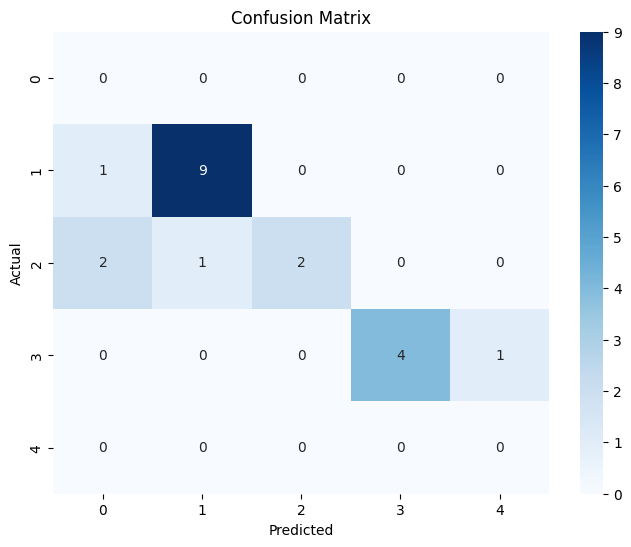

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.90      0.90      0.90        10
           3       1.00      0.40      0.57         5
           4       1.00      0.80      0.89         5
           5       0.00      0.00      0.00         0

    accuracy                           0.75        20
   macro avg       0.58      0.42      0.47        20
weighted avg       0.95      0.75      0.82        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Desicion Tree
from sklearn.tree import DecisionTreeClassifier

# Menerapkan algoritma Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Evaluasi model
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)

cm = confusion_matrix(y_test, y_pred)
# Buat visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Accuracy Score: 0.8


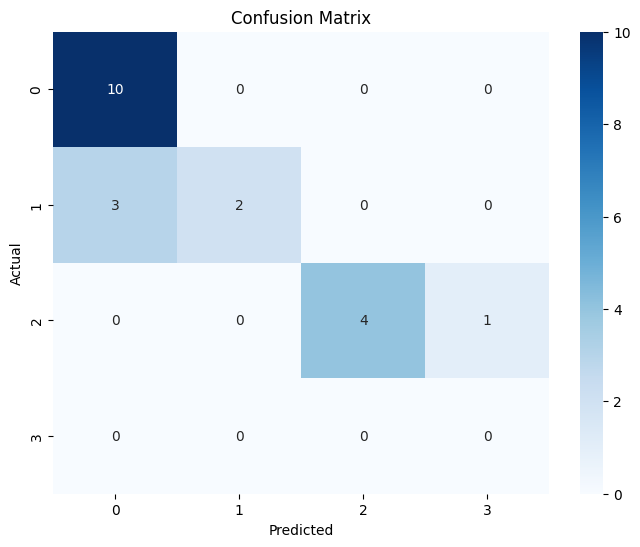

Classification Report:
               precision    recall  f1-score   support

           2       0.77      1.00      0.87        10
           3       1.00      0.40      0.57         5
           4       1.00      0.80      0.89         5
           5       0.00      0.00      0.00         0

    accuracy                           0.80        20
   macro avg       0.69      0.55      0.58        20
weighted avg       0.88      0.80      0.80        20

Class Probabilities:
 [[0.05 0.11 0.05 0.68 0.11]
 [0.04 0.7  0.04 0.18 0.04]
 [0.01 0.68 0.19 0.09 0.03]
 [0.02 0.91 0.07 0.   0.  ]
 [0.   0.04 0.89 0.06 0.01]
 [0.15 0.08 0.22 0.2  0.35]
 [0.08 0.77 0.15 0.   0.  ]
 [0.   0.97 0.03 0.   0.  ]
 [0.21 0.35 0.24 0.17 0.03]
 [0.05 0.51 0.28 0.13 0.03]
 [0.07 0.41 0.34 0.17 0.01]
 [0.08 0.17 0.73 0.02 0.  ]
 [0.02 0.01 0.02 0.8  0.15]
 [0.01 0.83 0.07 0.08 0.01]
 [0.   0.29 0.05 0.65 0.01]
 [0.01 0.45 0.09 0.43 0.02]
 [0.01 0.08 0.12 0.78 0.01]
 [0.01 0.83 0.07 0.08 0.01]
 [0.14 0.56 0.2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Menerapkan algoritma Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluasi model
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)

cm = confusion_matrix(y_test, y_pred)
# Buat visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Hitung probabilitas kelas
class_probs = rf_classifier.predict_proba(X_test)
print('Class Probabilities:\n', class_probs)